<a href="https://colab.research.google.com/github/justlab11/MLTSA22_JLabombard/blob/main/HW5/JL_HW5_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"> FBB very well done! </font>

### Imports

In [ ]:
import pylab as pl
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
from sklearn import cluster

### Getting the Data
* The data is population data for 200+ countries from 1960-2020.
* xlrd is used along with pandas to open the data

In [ ]:
cd drive/MyDrive/MLTSA22

/content/drive/MyDrive/MLTSA22


<font color="red"> FBB minor, but you should have an explicit statement where you mount your device on google (from google....) cause someone other than the author of the notebook that opens your notebook cannot automatically mount for security reasons</font>

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-15 02:38:59--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel.1’

SP.POP.TOTL?downloa 100%[===================>] 191.00K  --.-KB/s    in 0.06s   

2022-03-15 02:39:00 (3.20 MB/s) - ‘SP.POP.TOTL?downloadformat=excel.1’ saved [195584/195584]



In [ ]:
!ls

In [ ]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 4.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
pop_df = pd.read_excel("SP.POP.TOTL?downloadformat=excel", skiprows=3, header=0, usecols=[0] + list(range(4,100))).set_index("Country Name")

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [ ]:
pop_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
pop_df.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


In [ ]:
pop_df.shape

(266, 61)

### Cleaning the Data
* The data has some NAN columns that should be dropped before continuing
* Also due to different countries having different population sizes, they should be scaled to keep all of the data consistent. Only the trends are important, the intercepts are irrelevant.

In [ ]:
pop_df_clean = pop_df.dropna(axis=1, how="all").dropna(axis=0, how="any")

In [ ]:
pop_df_clean.shape

(262, 61)

Text(0, 0.5, 'pop')

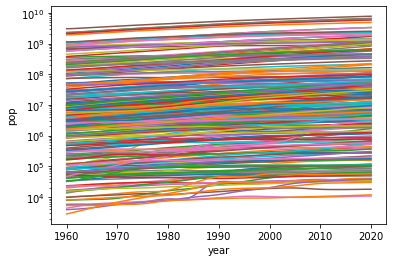

In [ ]:
pop_df_clean.T.plot(legend=False, logy=True)
pl.xlabel("year")
pl.ylabel("pop")

Figure 1: Population from 1960-2020 for 262 countries plotted on a logplot. Each line has a slightly positive slope which becomes an exponential slope in a lienar plot. This matches what population growth is expected to look like.

<font color="red"> FBB very good</font>

In [ ]:
pop_df_clean_scaled = preprocessing.scale(pop_df_clean, axis=1) # subtracts mean, divides by standard deviation
pop_df_clean_scaled.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


(262, 61)

In [ ]:
pop_df_clean_scaled.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

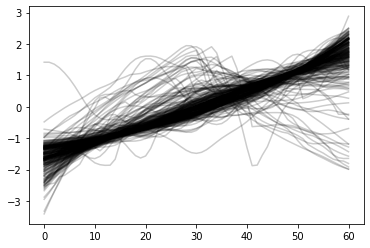

In [ ]:
pl.plot(pop_df_clean_scaled.T, "k", alpha=0.2);

Figure 2: Plot of the scaled population data from 1960-2020 (0-60). The thick black line shows that there are several countries with similar growth patterns. The thinner lines show the countries that have more unique population growth. There seem to be 2 general patterns that countries follow:
1. An increase in the population over time.
2. A rise and then fall in population over time.

<font color="red"> FBB very good</font>

### Clustering the Data
* Now that the data has been cleaned, I will use the k-means algorithm from sklearn to cluster the data.
* I will look at the trends in the smaller clusters and try to determine why some countries were grouped together.

In [ ]:
pop_cluster = cluster.k_means(pop_df_clean_scaled, 4)

In [ ]:
pop_cluster[1]

array([3, 3, 3, 3, 3, 2, 0, 3, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 1,
       3, 0, 1, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 0, 0, 2, 2, 3, 3, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 1, 3, 0, 3, 0, 0, 0, 2, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3,
       0, 3, 2, 3, 0, 2, 0, 0, 3, 3, 1, 3, 1, 0, 0, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 0, 3, 2, 2, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 0, 0, 3, 2, 3, 3, 3, 0, 0, 0,
       2, 3, 3, 0, 0, 2, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 2, 0, 0, 0, 0, 0, 0, 3, 1,
       2, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0,
       3, 3, 1, 0, 0, 0, 0, 2, 0, 3, 2, 0, 3, 0, 0, 2, 3, 0, 3, 0],
      dtype=int32)

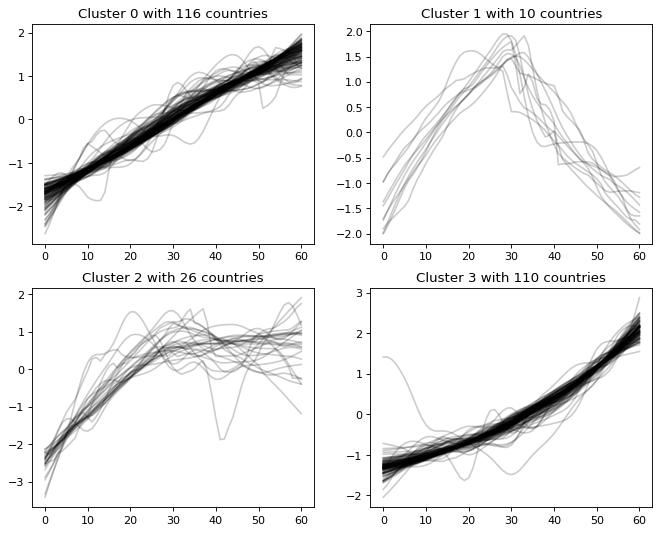

In [ ]:
pl.figure(figsize=(10,8), dpi=80)

for i in range(4):
  pl.subplot(2,2,i+1)
  pl.plot(pop_df_clean_scaled[pop_cluster[1]==i].T, "k", alpha=0.2);
  pl.title(f"Cluster {i} with {(pop_cluster[1]==i).sum()} countries")

Figure 3: Plots of the clusters found by the k-means algorithm to find 4 cluster. Four clusters were used in class and they provide reasonably similar shapes.
  * Cluster 0 includes 116 countries that have had a continuous increase.
  * Cluster 1 includes 10 countries that increased for 30 years, then began to decrease again.
  * Cluster 2 includes 26 countries that increased for the first 30 years, then remained more steady
  * Cluster 3 includes 110 countries that increased over time, like cluster 0, but in a non-linear way.


<font color="red"> FBB very good</font>

In [ ]:
print("Cluster 1, with 10 countries, includes:")
pop_df.index[np.where(pop_cluster[1]==1)]

Cluster 1, with 10 countries, includes:


Index(['Bulgaria', 'Bosnia and Herzegovina', 'Spain', 'United Kingdom',
       'Heavily indebted poor countries (HIPC)', 'Haiti',
       'Low & middle income', 'Late-demographic dividend',
       'Pacific island small states', 'Turkey'],
      dtype='object', name='Country Name')

I found an article:  [Why Is Spain's Population Decreasing?](https://expandinginspain.com/macro/population) that discusses the problems Spain faces with emigration, the economy, the climate, and cultural shifts. 

Another article: [UK seeks ways to address the falling demographic crisis](https://www.trtworld.com/magazine/uk-seeks-ways-to-address-the-falling-demographic-crisis-48171) states that in the UK, there is also an issue with declining birth rates due to insecurity among younger citizens.

Both of these countries had increasing populations from 1960-1990 where there was a large economic shift and improvements in technology. From 1990-2020 there is a growing concern about climate change in young people leading to the decrease shown now.

In [ ]:
print("Cluster 2, with 26 countries, includes:")
pop_df.index[np.where(pop_cluster[1]==2)]

Cluster 2, with 26 countries, includes:


Index(['Albania', 'Armenia', 'Belarus', 'Central Europe and the Baltics',
       'Cuba', 'Curacao', 'Czech Republic', 'Dominica', 'France', 'Grenada',
       'Guam', 'Jamaica', 'Jordan', 'St. Martin (French part)', 'Mexico',
       'Malta', 'Philippines', 'Papua New Guinea', 'Post-demographic dividend',
       'Sierra Leone', 'Sub-Saharan Africa', 'Small states', 'Turkmenistan',
       'Upper middle income', 'Uzbekistan', 'Vietnam'],
      dtype='object', name='Country Name')

I could not find any articles on this, but many of these countries are relatively "under the radar." Uzbekistan, Sierra Leone, Guam, and many others on this list are relatively quiet places where there is not a lot of international traffic (France and Jamaica are exceptions). The populations boomed during the time when traveling was becoming more popular and important, but now there is not much going on.

### Determining the Best Number of Clusters
* I originally tried four clusters because that was used originally. I will now calculate the intracluster variance for different numbers of clusters in order to determine the best number of clusters.

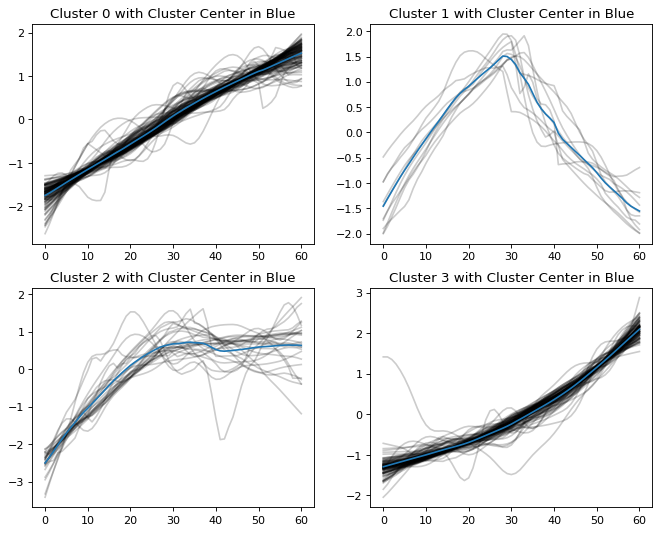

In [ ]:
pl.figure(figsize=(10,8), dpi=80)

for i in range(4):
  pl.subplot(2,2,i+1)
  pl.plot(pop_df_clean_scaled[pop_cluster[1]==i].T, "k", alpha=0.2);
  pl.plot(pop_cluster[0][i].T);
  pl.title(f"Cluster {i} with Cluster Center in Blue")

Figure 4: Same as Figure 3, but now shows the clusters' centers. The centers are reasonably close to the middle of the groups of lines. The lines match the descriptions I stated in Figure 3 as well.

<font color="red"> FBB ok</font>




In [ ]:
n_vals = []
cluster_values = []

for n in range(2,11): # iterate through different number of clusters (2-10)
  n_vals.append(n)
  clust = cluster.k_means(pop_df_clean_scaled, n)
  sum = 0
  for j in range(n): # iterate through individual clusters
    center = clust[0][j]
    for i in range((clust[1]==j).sum()): # iterate through individual lines
      sum += ((pop_df_clean_scaled[clust[1]==j][i] - center) ** 2).sum()
  cluster_values.append(sum)


Text(0.5, 1.0, 'Intracluster Variance for Different Cluster Sizes')

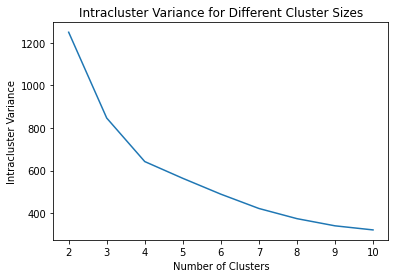

In [ ]:
pl.plot(n_vals, cluster_values)
pl.xlabel("Number of Clusters")
pl.ylabel("Intracluster Variance")
pl.title("Intracluster Variance for Different Cluster Sizes")

Figure 5: Plot of the intracluster variance as the number of clusters increases. There is no sharp elbow that appears using the "elbow method." Since there is no elbow, it would be difficult to make a data-informed decision.

<font color="red"> FBB very good</font>

### Extra Credit
* I used k-means originally, but there are other algorithms.
* I will use hierarchical clustering to create a dendrogram and see what it looks like.

In [ ]:
hier_cluster = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hier_cluster = hier_cluster.fit(pop_df_clean_scaled)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


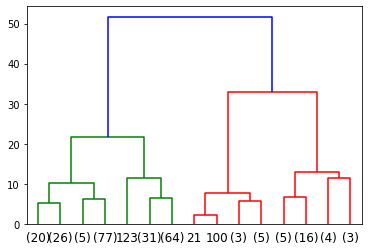

In [ ]:
plot_dendrogram(hier_cluster, truncate_mode="level", p=3)

Figure 6: Dendrogram using hierarchical clustering. There are 15 leaves (number of values on the x-axis) due to using a truncated plot. The numbers in parenthesese are the number of countries in that section, the regular numbers are indexes for countries. In this view, there is only one index-pair that can be seen, 21 and 100. There is another index, #123, that is far from the other indexes. The rest of the countries would require a deeper tree.

<font color="red"> FBB very good</font>

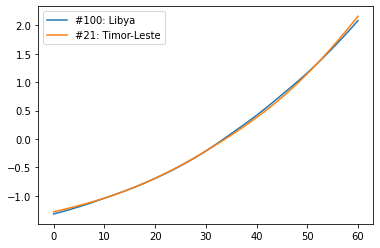

In [ ]:
pl.plot(pop_df_clean_scaled[hier_cluster.labels_==100][0]);
pl.plot(pop_df_clean_scaled[hier_cluster.labels_==21][0]);

pl.legend([f"#100: {pop_df.index[np.where(hier_cluster.labels_==100)].values[0]}",
           f"#21: {pop_df.index[np.where(hier_cluster.labels_==21)].values[0]}"])

Figure 7: Plot of Libya and Timor-Leste population data. These countries are #21 and #100 from Figure 6, which were clustered closest together. The growth is nearly a perfect match so the dendrogram makes sense for this pair.

<font color="red"> FBB very good investigative work! excellent!</font>

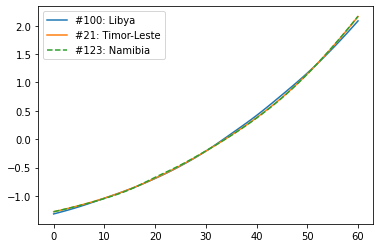

In [ ]:
pl.plot(pop_df_clean_scaled[hier_cluster.labels_==100][0]);
pl.plot(pop_df_clean_scaled[hier_cluster.labels_==21][0]);
pl.plot(pop_df_clean_scaled[hier_cluster.labels_==123][0], "--");

pl.legend([f"#100: {pop_df.index[np.where(hier_cluster.labels_==100)].values[0]}",
           f"#21: {pop_df.index[np.where(hier_cluster.labels_==21)].values[0]}",
           f"#123: {pop_df.index[np.where(hier_cluster.labels_==123)].values[0]}"])

Figure 8: Same as Figure 7, but now including Namibia, #123. This country's index was far from the other two so I expected it to be a different shape from the others. It also completely overlaps the other countries' population growth which is interesting.

<font color="red"> FBB well done!</font>